In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/formula-1-world-championship-1950-2020/races.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/drivers.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructors.csv
/kaggle/input/formula-1-world-championship-1950-2020/lap_times.csv
/kaggle/input/formula-1-world-championship-1950-2020/status.csv
/kaggle/input/formula-1-world-championship-1950-2020/driver_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/seasons.csv
/kaggle/input/formula-1-world-championship-1950-2020/pit_stops.csv
/kaggle/input/formula-1-world-championship-1950-2020/sprint_results.csv
/kaggle/input/formula-1-world-championship-1950-2020/constructor_standings.csv
/kaggle/input/formula-1-world-championship-1950-2020/results.csv
/kaggle/input/formula-1-world-championship-1950-2020/circuits.csv
/kaggle/input/formula-1-world-championship-1950-2020/qualifying.csv


In [ ]:
# dropNA
NA_val = df_cleaned.isna().sum()def na_filter(na, threshold = .4): #only select variables that passees the threshold
    col_pass = []
    for i in na.keys():
        if na[i]/df_cleaned.shape[0]<threshold:
            col_pass.append(i)
    return col_passdf_cleaned = df_cleaned[na_filter(NA_val)]
df_cleaned.columns

In [ ]:
#QUESTIONS
#WHAT FACTORS DETERMINE WHO WILL WIN A GP PER GP?
#How did lap times change over time per GP
#Is there a relationship between a constructor and GP 
#Is ther a relationship between driver and GP
#Check correlation and GP wins for rest of the variables
#Top racers win ratio at each GP (plot how many win per driver in GP - top 10)

#1- plot wins per gp
#2- plot lap times vs win per gp
#3- plot different paraemters vs wins per gp

In [ ]:
#ANALYSIS
#By constructor over the years (secondsXYear)
#duration by constructor (secondsXconstructor)
#Seconds by circuit
#pit stop distribution in general
#distribution by circuit
#distribution by constructor
#laps per position, correlation graph

In [ ]:
#ANALYSIS
#0. Intro
    #0.0 DEFINE QUESTIONS/WHAT ARE YOU GOING TO EXPLORE
    #0.1 Import packages

#1. cleandata
    #1.1 Read data
    #1.2 check data types (.info())
    #1.3 check check na values 
    #1.4 Check for na values. visualize na values in heatmap
        #0.4.1 determine why are they missing: missing completely at random, missing at ranodm, missing not at random.
        #0.4.2 in case of not at random, find most common ocurrence (median) and fill the values with that
    #1.5 Remove redundant variableS
    #1.6 CHECK NA PERCENTAGES. Remove columns that have 40%+ null values (REPLACE VALUES WITH MEAN FOR O`THERS)
        
#2. data exploration
    #2.0 Remove outliers (use reasoning on determine boundaries and parameters)
        #2.0.1 univariate outliers (same variable, outside range) vs multivariate outliers (outside range when plotted against other var)
        #2.0.2 univariate analisis (normalize data)
    #2.1. analyze std dev of variables, remove outliers (analyze relationships)
    #2.2 plot correlation graph
        #2.1.1 list positive correlations and negative
    #2.3 scatter plot
    #2.4 pair plot to show correlation between all variables
    #2.5 histogram
    #2.6 boxplot
    
#3. ML...

In [61]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import datetime

import warnings
warnings.filterwarnings("ignore")

# DATA CLEANING

In [3]:
#Read data

circuits = pd.read_csv('../input/formula-1-world-championship-1950-2020/circuits.csv', na_values=r'\N')
constructor_results = pd.read_csv('../input/formula-1-world-championship-1950-2020/constructor_results.csv', na_values=r'\N')
constructor_standings = pd.read_csv('../input/formula-1-world-championship-1950-2020/constructor_standings.csv', na_values=r'\N')
constructors = pd.read_csv('../input/formula-1-world-championship-1950-2020/constructors.csv', na_values=r'\N')
driver_standings = pd.read_csv('../input/formula-1-world-championship-1950-2020/driver_standings.csv', na_values=r'\N')
drivers = pd.read_csv('../input/formula-1-world-championship-1950-2020/drivers.csv', na_values=r'\N')
lap_times = pd.read_csv('../input/formula-1-world-championship-1950-2020/lap_times.csv', na_values=r'\N')
pit_stops = pd.read_csv('../input/formula-1-world-championship-1950-2020/pit_stops.csv', na_values=r'\N')
qualifying = pd.read_csv('../input/formula-1-world-championship-1950-2020/qualifying.csv', na_values=r'\N')
races = pd.read_csv('../input/formula-1-world-championship-1950-2020/races.csv', na_values=r'\N')
results = pd.read_csv('../input/formula-1-world-championship-1950-2020/results.csv', na_values=r'\N')
seasons = pd.read_csv('../input/formula-1-world-championship-1950-2020/seasons.csv', na_values=r'\N')
sprint_results = pd.read_csv('../input/formula-1-world-championship-1950-2020/sprint_results.csv', na_values=r'\N')
status = pd.read_csv('../input/formula-1-world-championship-1950-2020/status.csv', na_values=r'\N')

In [4]:
circuits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76 entries, 0 to 75
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   76 non-null     int64  
 1   circuitRef  76 non-null     object 
 2   name        76 non-null     object 
 3   location    76 non-null     object 
 4   country     76 non-null     object 
 5   lat         76 non-null     float64
 6   lng         76 non-null     float64
 7   alt         74 non-null     float64
 8   url         76 non-null     object 
dtypes: float64(3), int64(1), object(5)
memory usage: 5.5+ KB


In [5]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10.0,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18.0,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7.0,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109.0,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130.0,http://en.wikipedia.org/wiki/Istanbul_Park


In [6]:
constructor_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12080 entries, 0 to 12079
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  12080 non-null  int64  
 1   raceId                12080 non-null  int64  
 2   constructorId         12080 non-null  int64  
 3   points                12080 non-null  float64
 4   status                17 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 472.0+ KB


In [7]:
#Drop status column since it has too many null values
constructor_results = constructor_results.drop(["status"], axis = 1)
constructor_results.head()

,constructorResultsId,raceId,constructorId,points
0,1,18,1,14.0
1,2,18,2,8.0
2,3,18,3,9.0
3,4,18,4,5.0
4,5,18,5,2.0


In [8]:
driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33686 entries, 0 to 33685
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  33686 non-null  int64  
 1   raceId             33686 non-null  int64  
 2   driverId           33686 non-null  int64  
 3   points             33686 non-null  float64
 4   position           33686 non-null  int64  
 5   positionText       33686 non-null  object 
 6   wins               33686 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [10]:
driver_standings = driver_standings.drop(["positionText"], axis = 1)

In [11]:
driver_standings.head()

,driverStandingsId,raceId,driverId,points,position,wins
0,1,18,1,10.0,1,1
1,2,18,2,8.0,2,0
2,3,18,3,6.0,3,0
3,4,18,4,5.0,4,0
4,5,18,5,4.0,5,0


In [12]:
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   driverId     854 non-null    int64  
 1   driverRef    854 non-null    object 
 2   number       51 non-null     float64
 3   code         97 non-null     object 
 4   forename     854 non-null    object 
 5   surname      854 non-null    object 
 6   dob          854 non-null    object 
 7   nationality  854 non-null    object 
 8   url          854 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 60.2+ KB


In [13]:
drivers["dob"] = pd.to_datetime(drivers["dob"])

<AxesSubplot:>

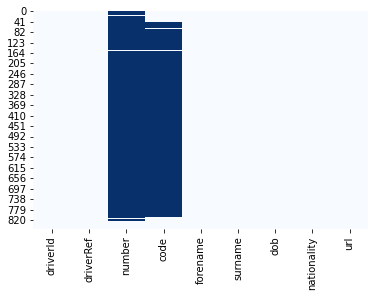

In [14]:
sns.heatmap(drivers.isnull(), cbar = False, cmap = 'Blues')

In [15]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6.0,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14.0,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [16]:
qualifying.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9395 entries, 0 to 9394
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   qualifyId      9395 non-null   int64 
 1   raceId         9395 non-null   int64 
 2   driverId       9395 non-null   int64 
 3   constructorId  9395 non-null   int64 
 4   number         9395 non-null   int64 
 5   position       9395 non-null   int64 
 6   q1             9248 non-null   object
 7   q2             5030 non-null   object
 8   q3             3094 non-null   object
dtypes: int64(6), object(3)
memory usage: 660.7+ KB


<AxesSubplot:>

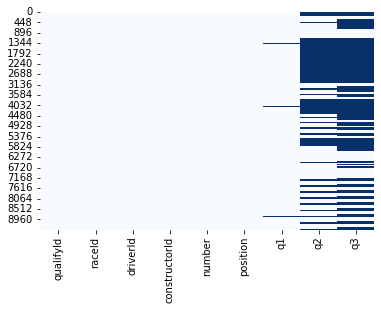

In [17]:
sns.heatmap(qualifying.isnull(), cbar = False, cmap = 'Blues')

In [18]:
#Drop q2 and q3 times since there are too many values missing
qualifying = qualifying.drop(["q2", "q3"], axis = 1)

In [19]:
#Converts time from the format (m:ss.ms) to ms without deleting nan
def convertTimeToMilli (target_df, col):
    
    target_df[col] = target_df[col].fillna("0:00.000")
    minutes = target_df[col].str.split(":", expand = True)
    secondsAndMs = minutes[1].str.split(".", expand = True)
    column = pd.to_timedelta(minutes[0].astype(int), unit = "m") + pd.to_timedelta(secondsAndMs[0].astype(int), unit = "s") + pd.to_timedelta(secondsAndMs[1].astype(int), unit = "ms")
    column = (column.dt.total_seconds() * 1000).astype(int)
    column.replace(0, np.nan, inplace = True)
    
    return column

In [20]:
qualifying["q1"] = convertTimeToMilli(qualifying, "q1")

In [21]:
#Replace NA in q1 with the mode of that specific race

In [22]:
#Replace NA in q1 with mode
qualifying["q1"].fillna(qualifying["q1"].mode()[0], inplace = True)

In [23]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1
0,1,18,1,1,22,1,86572.0
1,2,18,9,2,4,2,86103.0
2,3,18,5,1,23,3,85664.0
3,4,18,13,6,2,4,85994.0
4,5,18,2,2,3,5,85960.0


In [24]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1079 entries, 0 to 1078
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1079 non-null   int64 
 1   year         1079 non-null   int64 
 2   round        1079 non-null   int64 
 3   circuitId    1079 non-null   int64 
 4   name         1079 non-null   object
 5   date         1079 non-null   object
 6   time         348 non-null    object
 7   url          1079 non-null   object
 8   fp1_date     44 non-null     object
 9   fp1_time     22 non-null     object
 10  fp2_date     44 non-null     object
 11  fp2_time     22 non-null     object
 12  fp3_date     38 non-null     object
 13  fp3_time     19 non-null     object
 14  quali_date   44 non-null     object
 15  quali_time   22 non-null     object
 16  sprint_date  6 non-null      object
 17  sprint_time  3 non-null      object
dtypes: int64(4), object(14)
memory usage: 151.9+ KB


In [25]:
races["date"] = pd.to_datetime(races["date"])

<AxesSubplot:>

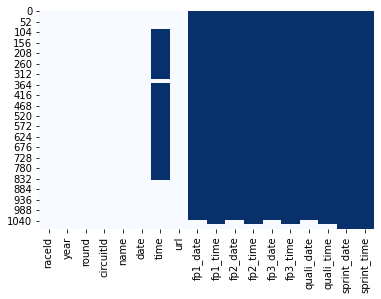

In [26]:
sns.heatmap(races.isnull(), cbar = False, cmap = 'Blues')

In [27]:
#Drop last 12 columns
races = races.drop(["time", "url", "fp1_date", "fp1_time", "fp2_date", "fp2_time", "fp3_date", "fp3_time", "quali_date", "quali_time", "sprint_date", "sprint_time"], axis = 1)

In [28]:
races.head()

,raceId,year,round,circuitId,name,date
0,1,2009,1,1,Australian Grand Prix,2009-03-29
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05
2,3,2009,3,17,Chinese Grand Prix,2009-04-19
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26
4,5,2009,5,4,Spanish Grand Prix,2009-05-10


In [29]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25660 non-null  int64  
 1   raceId           25660 non-null  int64  
 2   driverId         25660 non-null  int64  
 3   constructorId    25660 non-null  int64  
 4   number           25654 non-null  float64
 5   grid             25660 non-null  int64  
 6   position         14833 non-null  float64
 7   positionText     25660 non-null  object 
 8   positionOrder    25660 non-null  int64  
 9   points           25660 non-null  float64
 10  laps             25660 non-null  int64  
 11  time             6964 non-null   object 
 12  milliseconds     6963 non-null   float64
 13  fastestLap       7206 non-null   float64
 14  rank             7411 non-null   float64
 15  fastestLapTime   7206 non-null   object 
 16  fastestLapSpeed  7206 non-null   float64
 17  statusId    

<AxesSubplot:>

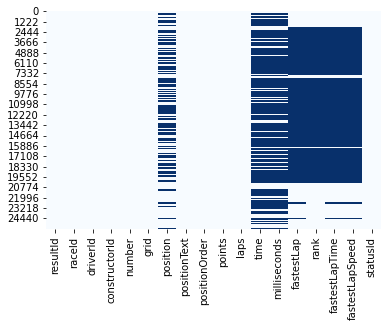

In [30]:
sns.heatmap(results.isnull(), cbar = False, cmap = 'Blues')

In [31]:
#Drop position and positionText since we get the position info from posotionOrder. Also drop the last 7 columns.
results = results.drop(["position", "positionText", "time", "milliseconds", "fastestLap", "rank", "fastestLapTime", "fastestLapSpeed"], axis = 1)

In [32]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId
0,1,18,1,1,22.0,1,1,10.0,58,1
1,2,18,2,2,3.0,5,2,8.0,58,1
2,3,18,3,3,7.0,7,3,6.0,58,1
3,4,18,4,4,5.0,11,4,5.0,58,1
4,5,18,5,1,23.0,3,5,4.0,58,1


In [70]:
#Merge data and drop unwanted values
merge_results_races = pd.merge(results, races.copy().drop(["name"], axis = 1), on = "raceId")
merge_drivers = pd.merge(merge_results_races, drivers.copy().drop(["driverRef", "number", "code", "forename", "surname", "url"], axis = 1), on = "driverId")
standings_merge = pd.merge(merge_drivers, driver_standings.copy().drop(["points"], axis = 1), on = ["driverId", "raceId"])
df = pd.merge(standings_merge, circuits.copy().drop(["circuitRef", "name", "location", "lat", "lng", "alt", "url"], axis = 1), on = "circuitId")

In [71]:
merge_results_races.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   resultId       25660 non-null  int64         
 1   raceId         25660 non-null  int64         
 2   driverId       25660 non-null  int64         
 3   constructorId  25660 non-null  int64         
 4   number         25654 non-null  float64       
 5   grid           25660 non-null  int64         
 6   positionOrder  25660 non-null  int64         
 7   points         25660 non-null  float64       
 8   laps           25660 non-null  int64         
 9   statusId       25660 non-null  int64         
 10  year           25660 non-null  int64         
 11  round          25660 non-null  int64         
 12  circuitId      25660 non-null  int64         
 13  date           25660 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(11)
memory usage: 2.9 MB


In [72]:
merge_drivers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   resultId       25660 non-null  int64         
 1   raceId         25660 non-null  int64         
 2   driverId       25660 non-null  int64         
 3   constructorId  25660 non-null  int64         
 4   number         25654 non-null  float64       
 5   grid           25660 non-null  int64         
 6   positionOrder  25660 non-null  int64         
 7   points         25660 non-null  float64       
 8   laps           25660 non-null  int64         
 9   statusId       25660 non-null  int64         
 10  year           25660 non-null  int64         
 11  round          25660 non-null  int64         
 12  circuitId      25660 non-null  int64         
 13  date           25660 non-null  datetime64[ns]
 14  dob            25660 non-null  datetime64[ns]
 15  nationality    2566

In [73]:
standings_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25191 entries, 0 to 25190
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   resultId           25191 non-null  int64         
 1   raceId             25191 non-null  int64         
 2   driverId           25191 non-null  int64         
 3   constructorId      25191 non-null  int64         
 4   number             25185 non-null  float64       
 5   grid               25191 non-null  int64         
 6   positionOrder      25191 non-null  int64         
 7   points             25191 non-null  float64       
 8   laps               25191 non-null  int64         
 9   statusId           25191 non-null  int64         
 10  year               25191 non-null  int64         
 11  round              25191 non-null  int64         
 12  circuitId          25191 non-null  int64         
 13  date               25191 non-null  datetime64[ns]
 14  dob   

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25191 entries, 0 to 25190
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   resultId           25191 non-null  int64         
 1   raceId             25191 non-null  int64         
 2   driverId           25191 non-null  int64         
 3   constructorId      25191 non-null  int64         
 4   number             25185 non-null  float64       
 5   grid               25191 non-null  int64         
 6   positionOrder      25191 non-null  int64         
 7   points             25191 non-null  float64       
 8   laps               25191 non-null  int64         
 9   statusId           25191 non-null  int64         
 10  year               25191 non-null  int64         
 11  round              25191 non-null  int64         
 12  circuitId          25191 non-null  int64         
 13  date               25191 non-null  datetime64[ns]
 14  dob   

In [75]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,round,circuitId,date,dob,nationality,driverStandingsId,position,wins,country
0,1,18,1,1,22.0,1,1,10.0,58,1,2008,1,1,2008-03-16,1985-01-07,British,1,1,1,Australia
1,371,36,1,1,2.0,4,3,6.0,58,1,2007,1,1,2007-03-18,1985-01-07,British,13615,3,0,Australia
2,20352,338,1,1,2.0,11,6,8.0,58,1,2010,2,1,2010-03-28,1985-01-07,British,63763,4,0,Australia
3,20780,841,1,1,3.0,2,2,18.0,58,1,2011,1,1,2011-03-27,1985-01-07,British,64691,2,0,Australia
4,21234,860,1,1,4.0,1,3,15.0,58,1,2012,1,1,2012-03-18,1985-01-07,British,64978,3,0,Australia


In [76]:
#modify date data
df["ageAtRace"] = (df["date"] - df["dob"]).astype('timedelta64[Y]').astype(int)
df["month"] = df["date"].dt.month
df["week"] = df["date"].dt.week
df["day"] = df["date"].dt.day

In [77]:
df = df.drop(["date", "dob"], axis = 1)

In [78]:
#change categorical data to numerical data

nationality = df.nationality.astype("category")
nationality_dict = dict(enumerate(nationality.cat.categories))

country = df.country.astype("category")
country_dict = dict(enumerate(country.cat.categories))

df["nationalityId"] = nationality.cat.codes
df["countryId"] = country.cat.codes

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25191 entries, 0 to 25190
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   resultId           25191 non-null  int64  
 1   raceId             25191 non-null  int64  
 2   driverId           25191 non-null  int64  
 3   constructorId      25191 non-null  int64  
 4   number             25185 non-null  float64
 5   grid               25191 non-null  int64  
 6   positionOrder      25191 non-null  int64  
 7   points             25191 non-null  float64
 8   laps               25191 non-null  int64  
 9   statusId           25191 non-null  int64  
 10  year               25191 non-null  int64  
 11  round              25191 non-null  int64  
 12  circuitId          25191 non-null  int64  
 13  nationality        25191 non-null  object 
 14  driverStandingsId  25191 non-null  int64  
 15  position           25191 non-null  int64  
 16  wins               251

In [80]:
df.head()

,resultId,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,...,driverStandingsId,position,wins,country,ageAtRace,month,week,day,nationalityId,countryId
0,1,18,1,1,22.0,1,1,10.0,58,1,...,1,1,1,Australia,23,3,11,16,8,1
1,371,36,1,1,2.0,4,3,6.0,58,1,...,13615,3,0,Australia,22,3,11,18,8,1
2,20352,338,1,1,2.0,11,6,8.0,58,1,...,63763,4,0,Australia,25,3,12,28,8,1
3,20780,841,1,1,3.0,2,2,18.0,58,1,...,64691,2,0,Australia,26,3,12,27,8,1
4,21234,860,1,1,4.0,1,3,15.0,58,1,...,64978,3,0,Australia,27,3,11,18,8,1


In [81]:
df = df.drop(["resultId", "driverStandingsId"], axis = 1)

# DATA EXPLORATION

## Complete Data - Univariate Analysis

In [82]:
df.describe()

,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,round,circuitId,position,wins,ageAtRace,month,week,day,nationalityId,countryId
count,25191.000000,25191.000000,25191.000000,25185.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000,25191.000000
mean,533.306617,262.022468,48.805605,17.773992,11.145369,12.781033,1.889050,46.377397,17.552578,1989.898972,8.411099,23.648684,14.693025,0.346791,29.570918,6.865944,27.699059,15.784050,16.319003,15.713350
std,295.951637,266.777948,59.732841,15.135419,7.239030,7.719718,4.161983,29.851188,26.136128,19.361183,4.879894,18.618752,11.016248,1.105733,5.264806,2.374506,10.258937,9.104578,10.266869,10.138104
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1950.000000,1.000000,1.000000,1.000000,0.000000,17.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,302.000000,57.000000,6.000000,7.000000,5.000000,6.000000,0.000000,22.000000,1.000000,1976.000000,4.000000,9.000000,7.000000,0.000000,26.000000,5.000000,20.000000,8.000000,8.000000,7.000000
50%,519.000000,165.000000,25.000000,15.000000,11.000000,12.000000,0.000000,53.000000,11.000000,1990.000000,8.000000,18.000000,13.000000,0.000000,29.000000,7.000000,28.000000,15.000000,18.000000,13.000000
75%,782.000000,360.000000,59.000000,24.000000,17.000000,18.000000,2.000000,67.000000,14.000000,2007.000000,12.000000,34.000000,20.000000,0.000000,33.000000,9.000000,36.000000,24.000000,24.000000,26.000000
max,1086.000000,855.000000,214.000000,208.000000,34.000000,39.000000,50.000000,200.000000,141.000000,2022.000000,22.000000,79.000000,105.000000,13.000000,58.000000,12.000000,53.000000,31.000000,41.000000,33.000000


<AxesSubplot:ylabel='nationality'>

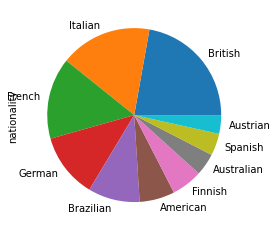

In [97]:
#Top 10 nationalities
df.nationality.value_counts()[:10].plot.pie()

<AxesSubplot:xlabel='ageAtRace', ylabel='Count'>

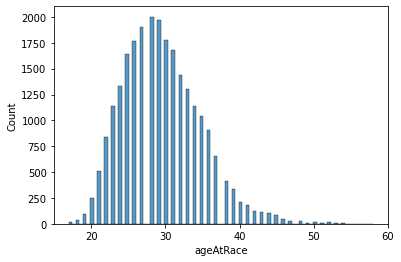

In [98]:
#Age distribution
sns.histplot(df.ageAtRace)

<AxesSubplot:ylabel='country'>

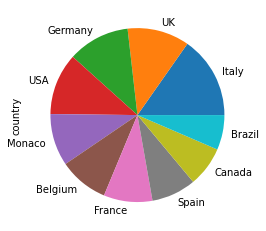

In [99]:
#Top 10 countries where GPs are located
df.country.value_counts()[:10].plot.pie()

<AxesSubplot:xlabel='q1', ylabel='Density'>

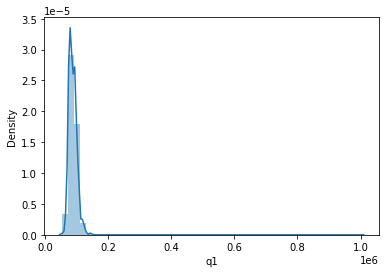

In [63]:
sns.distplot(qualifying["q1"])

In [36]:
print("Skewness: %f" % qualifying["q1"].skew())
print("Kurtosis: %f" % qualifying["q1"].kurt())

#High Kurtosis indicates the presence of outliers

Skewness: 21.638917
Kurtosis: 1241.764964


In [64]:
#Standarize q1 data
q1_scaled = StandardScaler().fit_transform(qualifying["q1"][:, np.newaxis]);
low_range = q1_scaled[q1_scaled[:, 0].argsort()][:10]
high_range = q1_scaled[q1_scaled[:, 0].argsort()][-10:]

print("Low range of the distribution: ")
print(low_range)

print("\nHigh range of the distribution: ")
print(high_range)

Low range of the distribution: 
[[-2.22388066]
 [-2.21537488]
 [-2.20750863]
 [-2.20533422]
 [-2.20450283]
 [-2.20264818]
 [-2.20181679]
 [-2.19849122]
 [-2.1979796 ]
 [-2.19561333]]

High range of the distribution: 
[[ 3.71315511]
 [ 3.72357949]
 [ 3.73982361]
 [ 3.74346895]
 [ 3.80384081]
 [ 3.85647433]
 [ 3.98131107]
 [ 4.03400855]
 [ 4.17022897]
 [58.45086746]]


<AxesSubplot:xlabel='laps', ylabel='Density'>

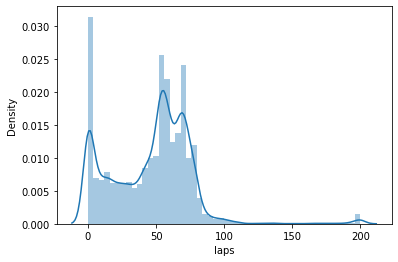

In [66]:
sns.distplot(results["laps"])

In [40]:
print("Skewness: %f" % results["laps"].skew())
print("Kurtosis: %f" % results["laps"].kurt())

Skewness: 0.735936
Kurtosis: 3.654366


<AxesSubplot:xlabel='statusId', ylabel='Density'>

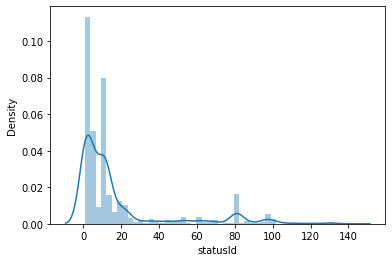

In [67]:
sns.distplot(results["statusId"])

## Complete Data - Multivariate Analysis

In [ ]:
df = df.drop(["nationality", "country"], axis = 1)

In [186]:
df.head()

,raceId,driverId,constructorId,number,grid,positionOrder,points,laps,statusId,year,round,circuitId,position,wins,nationalityId,countryId,ageAtRace,month,week,day
0,18,1,1,22.0,1,1,10.0,58,1,2008,1,1,1,1,8,1,23,3,11,16
1,36,1,1,2.0,4,3,6.0,58,1,2007,1,1,3,0,8,1,22,3,11,18
2,338,1,1,2.0,11,6,8.0,58,1,2010,2,1,4,0,8,1,25,3,12,28
3,841,1,1,3.0,2,2,18.0,58,1,2011,1,1,2,0,8,1,26,3,12,27
4,860,1,1,4.0,1,3,15.0,58,1,2012,1,1,3,0,8,1,27,3,11,18


<AxesSubplot:>

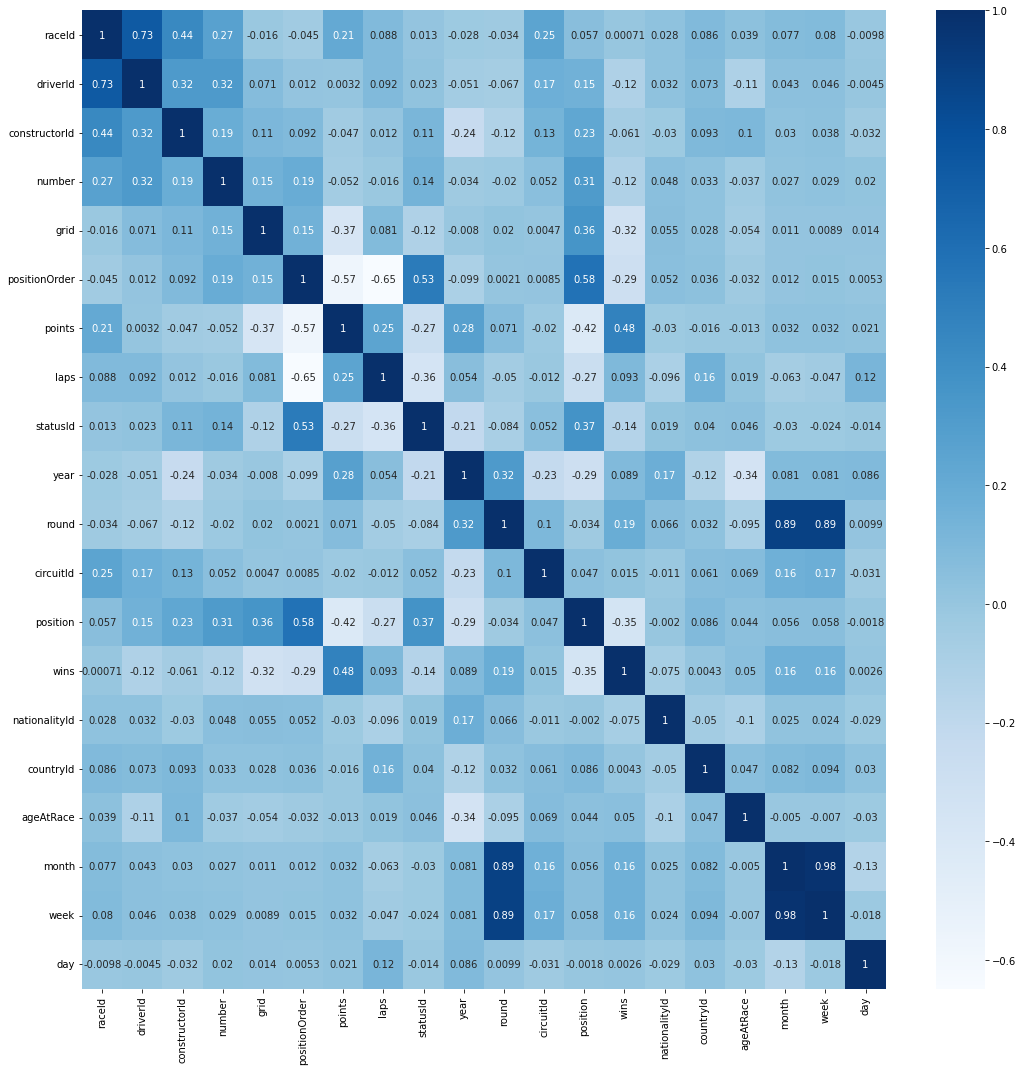

In [187]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), cbar = True, annot = True, cmap = 'Blues')

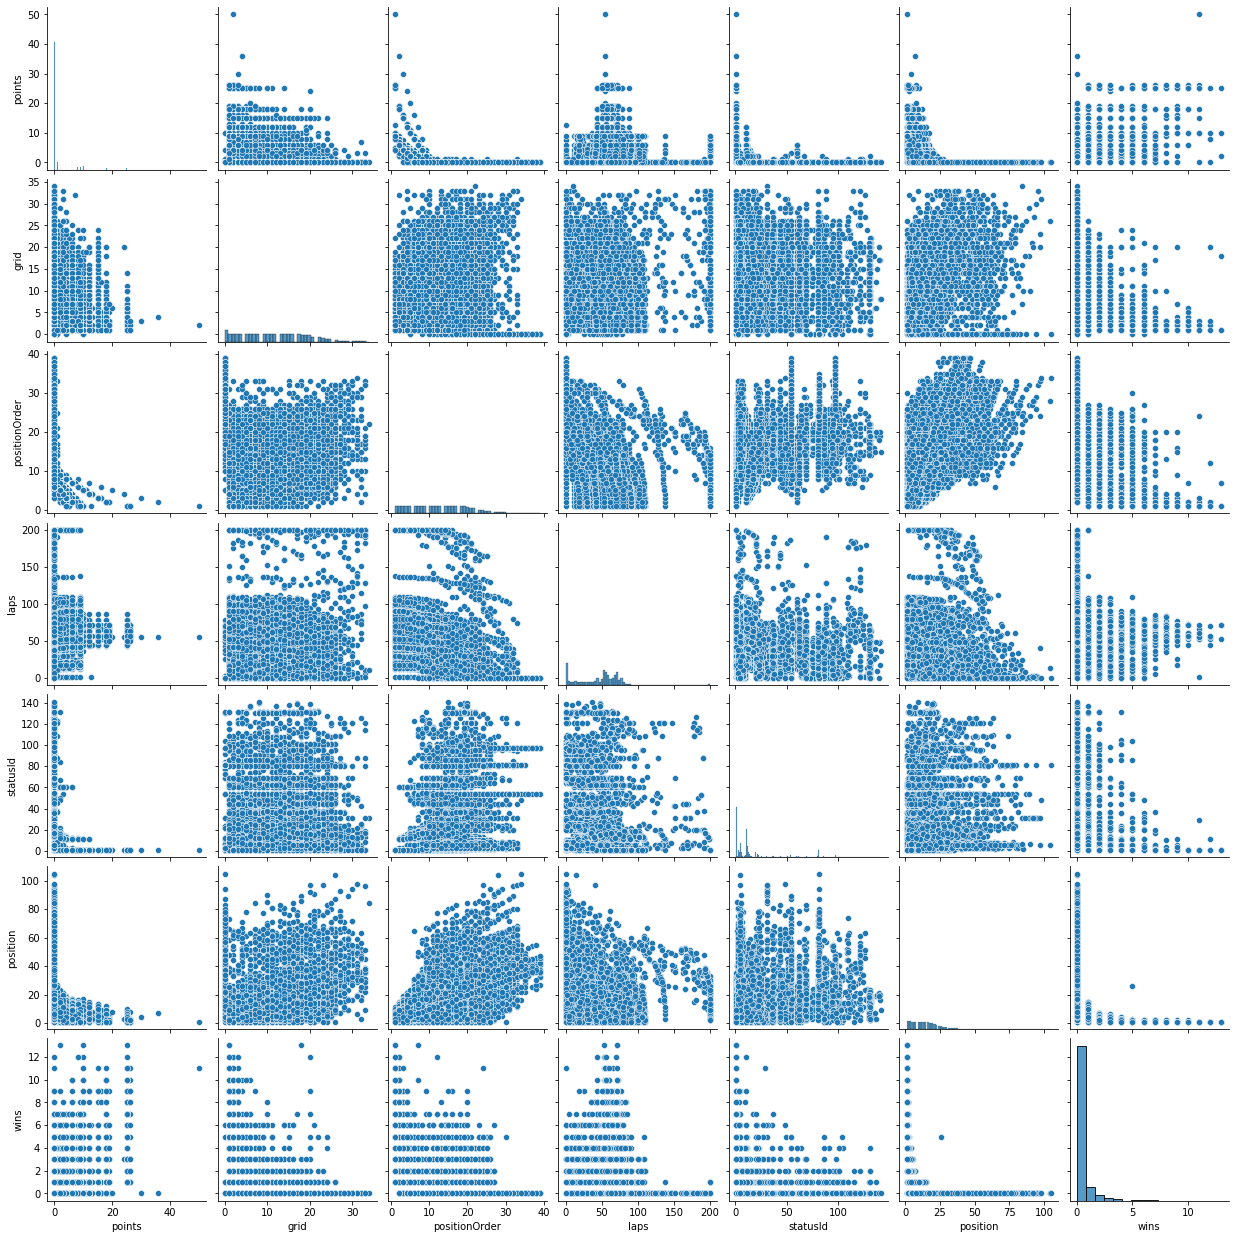

In [100]:
sns.pairplot(df, vars = ["points", "grid", "positionOrder", "laps", "statusId", "position", "wins"])

In [ ]:
#OLD 2

In [149]:
races_circuits = pd.merge(races, circuits, on = "circuitId")
#races_circuits.hist(column = "name_x")

In [153]:

races_circuits["name_x"].value_counts()

British Grand Prix               73
Italian Grand Prix               73
Monaco Grand Prix                68
Belgian Grand Prix               67
German Grand Prix                64
French Grand Prix                62
Spanish Grand Prix               52
Canadian Grand Prix              51
Brazilian Grand Prix             48
United States Grand Prix         43
Hungarian Grand Prix             37
Australian Grand Prix            36
Japanese Grand Prix              36
Austrian Grand Prix              35
Dutch Grand Prix                 32
San Marino Grand Prix            26
European Grand Prix              23
South African Grand Prix         23
Mexican Grand Prix               20
Argentine Grand Prix             20
Malaysian Grand Prix             19
Portuguese Grand Prix            18
Bahrain Grand Prix               18
Chinese Grand Prix               16
Abu Dhabi Grand Prix             14
Singapore Grand Prix             13
Indianapolis 500                 11
Turkish Grand Prix          

In [8]:
#MERGE DATA FOR 1 TRACK

merge1 = pd.merge(results, races, on = "raceId")
merge2 = pd.merge(merge1, drivers, on = "driverId")
merge3 = pd.merge(merge2, driver_standings, on = "driverId")
merge4 = pd.merge(merge3, constructors, on = "constructorId")
df = pd.merge(merge4, status, on = "statusId")

In [22]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25660 entries, 0 to 25659
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25660 non-null  int64  
 1   raceId           25660 non-null  int64  
 2   driverId         25660 non-null  int64  
 3   constructorId    25660 non-null  int64  
 4   number           25654 non-null  float64
 5   grid             25660 non-null  int64  
 6   position         14833 non-null  float64
 7   positionText     25660 non-null  object 
 8   positionOrder    25660 non-null  int64  
 9   points           25660 non-null  float64
 10  laps             25660 non-null  int64  
 11  time             6964 non-null   object 
 12  milliseconds     6963 non-null   float64
 13  fastestLap       7206 non-null   float64
 14  rank             7411 non-null   float64
 15  fastestLapTime   7206 non-null   object 
 16  fastestLapSpeed  7206 non-null   float64
 17  statusId    

In [15]:
merge1.isna().sum()

resultId               0
raceId                 0
driverId               0
constructorId          0
number                 6
grid                   0
position           10827
positionText           0
positionOrder          0
points                 0
laps                   0
time_x             18696
milliseconds       18697
fastestLap         18454
rank               18249
fastestLapTime     18454
fastestLapSpeed    18454
statusId               0
year                   0
round                  0
circuitId              0
name                   0
date                   0
time_y             18469
url                    0
fp1_date           24960
fp1_time           25400
fp2_date           24960
fp2_time           25400
fp3_date           25060
fp3_time           25440
quali_date         24960
quali_time         25400
sprint_date        25560
sprint_time        25620
dtype: int64

In [14]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25660 non-null  int64  
 1   raceId           25660 non-null  int64  
 2   driverId         25660 non-null  int64  
 3   constructorId    25660 non-null  int64  
 4   number           25654 non-null  float64
 5   grid             25660 non-null  int64  
 6   position         14833 non-null  float64
 7   positionText     25660 non-null  object 
 8   positionOrder    25660 non-null  int64  
 9   points           25660 non-null  float64
 10  laps             25660 non-null  int64  
 11  time_x           6964 non-null   object 
 12  milliseconds     6963 non-null   float64
 13  fastestLap       7206 non-null   float64
 14  rank             7411 non-null   float64
 15  fastestLapTime   7206 non-null   object 
 16  fastestLapSpeed  7206 non-null   float64
 17  statusId    

In [9]:
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,...,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name_y,nationality_y,url,status
0,1,18,1,1,22.0,1,1.0,1,1,10.0,...,18,10.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
1,1,18,1,1,22.0,1,1.0,1,1,10.0,...,19,14.0,1,1,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
2,1,18,1,1,22.0,1,1.0,1,1,10.0,...,20,14.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
3,1,18,1,1,22.0,1,1.0,1,1,10.0,...,21,20.0,2,2,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished
4,1,18,1,1,22.0,1,1.0,1,1,10.0,...,22,28.0,3,3,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren,Finished


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3420101 entries, 0 to 3420100
Data columns (total 54 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           float64
 5   grid               int64  
 6   position_x         float64
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time_x             object 
 12  milliseconds       float64
 13  fastestLap         float64
 14  rank               float64
 15  fastestLapTime     object 
 16  fastestLapSpeed    float64
 17  statusId           int64  
 18  year               int64  
 19  round              int64  
 20  circuitId          int64  
 21  name_x             object 
 22  date               object 
 23  time_y             object 
 24  url_x              object 
 25  fp1_date          

In [140]:
df.isna().sum()

resultId                   0
raceId_x                   0
driverId                   0
constructorId              0
number_x                 160
grid                       0
position_x           1218103
positionText_x             0
positionOrder              0
points_x                   0
laps                       0
time_x               2134263
milliseconds         2134318
fastestLap           2135879
rank                 2104478
fastestLapTime       2135879
fastestLapSpeed      2135879
statusId                   0
year                       0
round                      0
circuitId                  0
name_x                     0
date                       0
time_y               2148955
url_x                      0
fp1_date             3317905
fp1_time             3384025
fp2_date             3317905
fp2_time             3384025
fp3_date             3332317
fp3_time             3389601
quali_date           3317905
quali_time           3384025
sprint_date          3405689
sprint_time   

In [ ]:
#OLD

In [13]:
lap_times_races_merge = pd.merge(lap_times, races, on = "raceId", how = "outer")
lap_times_drivers_merge = pd.merge(lap_times_races_merge, new_drivers, on = "driverId")
lap_times_drivers_merge

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,...,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,code,forename,surname
0,841,20.0,1.0,1.0,1:38.109,98109.0,2011,1,1,Australian Grand Prix,...,\N,\N,\N,\N,\N,\N,\N,VET,Sebastian,Vettel
1,841,20.0,2.0,1.0,1:33.006,93006.0,2011,1,1,Australian Grand Prix,...,\N,\N,\N,\N,\N,\N,\N,VET,Sebastian,Vettel
2,841,20.0,3.0,1.0,1:32.713,92713.0,2011,1,1,Australian Grand Prix,...,\N,\N,\N,\N,\N,\N,\N,VET,Sebastian,Vettel
3,841,20.0,4.0,1.0,1:32.803,92803.0,2011,1,1,Australian Grand Prix,...,\N,\N,\N,\N,\N,\N,\N,VET,Sebastian,Vettel
4,841,20.0,5.0,1.0,1:32.342,92342.0,2011,1,1,Australian Grand Prix,...,\N,\N,\N,\N,\N,\N,\N,VET,Sebastian,Vettel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528780,1086,855.0,65.0,16.0,1:22.832,82832.0,2022,13,11,Hungarian Grand Prix,...,15:00:00,2022-07-30,11:00:00,2022-07-30,14:00:00,\N,\N,ZHO,Guanyu,Zhou
528781,1086,855.0,66.0,15.0,1:23.640,83640.0,2022,13,11,Hungarian Grand Prix,...,15:00:00,2022-07-30,11:00:00,2022-07-30,14:00:00,\N,\N,ZHO,Guanyu,Zhou
528782,1086,855.0,67.0,15.0,1:49.359,109359.0,2022,13,11,Hungarian Grand Prix,...,15:00:00,2022-07-30,11:00:00,2022-07-30,14:00:00,\N,\N,ZHO,Guanyu,Zhou
528783,1086,855.0,68.0,15.0,1:33.191,93191.0,2022,13,11,Hungarian Grand Prix,...,15:00:00,2022-07-30,11:00:00,2022-07-30,14:00:00,\N,\N,ZHO,Guanyu,Zhou


In [14]:
years = np.sort(lap_times_drivers_merge["year"].unique())[::-1]

In [15]:
lap_times_drivers_merge.dtypes

raceId                   int64
driverId               float64
lap                    float64
position               float64
time_x                  object
milliseconds           float64
year                     int64
round                    int64
circuitId                int64
name                    object
date            datetime64[ns]
time_y                  object
url                     object
fp1_date                object
fp1_time                object
fp2_date                object
fp2_time                object
fp3_date                object
fp3_time                object
quali_date              object
quali_time              object
sprint_date             object
sprint_time             object
code                    object
forename                object
surname                 object
dtype: object

In [16]:
lap_times_drivers_merge[lap_times_drivers_merge["year"] == 2021]

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,...,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,code,forename,surname
14063,1052,20.0,1.0,14.0,2:21.797,141797.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,VET,Sebastian,Vettel
14064,1052,20.0,2.0,14.0,2:18.294,138294.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,VET,Sebastian,Vettel
14065,1052,20.0,3.0,14.0,2:22.630,142630.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,VET,Sebastian,Vettel
14066,1052,20.0,4.0,13.0,1:57.475,117475.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,VET,Sebastian,Vettel
14067,1052,20.0,5.0,14.0,1:41.948,101948.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,VET,Sebastian,Vettel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528177,1072,853.0,10.0,17.0,2:02.903,122903.0,2021,21,77,Saudi Arabian Grand Prix,...,\N,2021-12-04,\N,2021-12-04,\N,\N,\N,MAZ,Nikita,Mazepin
528178,1072,853.0,11.0,16.0,2:26.740,146740.0,2021,21,77,Saudi Arabian Grand Prix,...,\N,2021-12-04,\N,2021-12-04,\N,\N,\N,MAZ,Nikita,Mazepin
528179,1072,853.0,12.0,16.0,2:43.497,163497.0,2021,21,77,Saudi Arabian Grand Prix,...,\N,2021-12-04,\N,2021-12-04,\N,\N,\N,MAZ,Nikita,Mazepin
528180,1072,853.0,13.0,16.0,3:10.385,190385.0,2021,21,77,Saudi Arabian Grand Prix,...,\N,2021-12-04,\N,2021-12-04,\N,\N,\N,MAZ,Nikita,Mazepin


In [17]:
lap_times_drivers_merge[lap_times_drivers_merge["year"] == 2022]

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,...,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,code,forename,surname
15326,1076,20.0,1.0,17.0,1:40.136,100136.0,2022,3,1,Australian Grand Prix,...,06:00:00,2022-04-09,03:00:00,2022-04-09,06:00:00,\N,\N,VET,Sebastian,Vettel
15327,1076,20.0,2.0,16.0,1:28.340,88340.0,2022,3,1,Australian Grand Prix,...,06:00:00,2022-04-09,03:00:00,2022-04-09,06:00:00,\N,\N,VET,Sebastian,Vettel
15328,1076,20.0,3.0,16.0,1:55.920,115920.0,2022,3,1,Australian Grand Prix,...,06:00:00,2022-04-09,03:00:00,2022-04-09,06:00:00,\N,\N,VET,Sebastian,Vettel
15329,1076,20.0,4.0,16.0,2:12.726,132726.0,2022,3,1,Australian Grand Prix,...,06:00:00,2022-04-09,03:00:00,2022-04-09,06:00:00,\N,\N,VET,Sebastian,Vettel
15330,1076,20.0,5.0,16.0,2:15.917,135917.0,2022,3,1,Australian Grand Prix,...,06:00:00,2022-04-09,03:00:00,2022-04-09,06:00:00,\N,\N,VET,Sebastian,Vettel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528780,1086,855.0,65.0,16.0,1:22.832,82832.0,2022,13,11,Hungarian Grand Prix,...,15:00:00,2022-07-30,11:00:00,2022-07-30,14:00:00,\N,\N,ZHO,Guanyu,Zhou
528781,1086,855.0,66.0,15.0,1:23.640,83640.0,2022,13,11,Hungarian Grand Prix,...,15:00:00,2022-07-30,11:00:00,2022-07-30,14:00:00,\N,\N,ZHO,Guanyu,Zhou
528782,1086,855.0,67.0,15.0,1:49.359,109359.0,2022,13,11,Hungarian Grand Prix,...,15:00:00,2022-07-30,11:00:00,2022-07-30,14:00:00,\N,\N,ZHO,Guanyu,Zhou
528783,1086,855.0,68.0,15.0,1:33.191,93191.0,2022,13,11,Hungarian Grand Prix,...,15:00:00,2022-07-30,11:00:00,2022-07-30,14:00:00,\N,\N,ZHO,Guanyu,Zhou


In [18]:
year_2021 = lap_times_drivers_merge[lap_times_drivers_merge["year"] == 2021]
year_2021 = year_2021.sort_values(by=["round", "driverId"])
total_rounds_2021 = year_2021["round"].unique()

for current_round in total_rounds_2021:
    print("CURRENT ROUND IS: " + str(current_round))
    race_df = year_2021[year_2021["round"] == current_round]
    race_name = str(race_df["name"].unique()[0])
    print("CURRENT GP IS: " + race_name)
    plot_race(race_df, race_name)
    #print(year_2021[year_2021["round"] == current_round])

In [33]:
bahrain_2021 = lap_times_drivers_merge[lap_times_drivers_merge["raceId"] == 1052]
bahrain_2021

,raceId,driverId,lap,position,time_x,milliseconds,year,round,circuitId,name,...,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,code,forename,surname
14063,1052,20.0,1.0,14.0,2:21.797,141797.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,VET,Sebastian,Vettel
14064,1052,20.0,2.0,14.0,2:18.294,138294.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,VET,Sebastian,Vettel
14065,1052,20.0,3.0,14.0,2:22.630,142630.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,VET,Sebastian,Vettel
14066,1052,20.0,4.0,13.0,1:57.475,117475.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,VET,Sebastian,Vettel
14067,1052,20.0,5.0,14.0,1:41.948,101948.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,VET,Sebastian,Vettel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525455,1052,854.0,51.0,17.0,1:36.652,96652.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,MSC,Mick,Schumacher
525456,1052,854.0,52.0,17.0,1:37.229,97229.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,MSC,Mick,Schumacher
525457,1052,854.0,53.0,16.0,1:36.856,96856.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,MSC,Mick,Schumacher
525458,1052,854.0,54.0,16.0,1:37.118,97118.0,2021,1,3,Bahrain Grand Prix,...,\N,2021-03-27,\N,2021-03-27,\N,\N,\N,MSC,Mick,Schumacher


In [41]:
def plot_race (df, race):
    
    scatter_drivers = px.scatter(
    data_frame = df, 
    x = "lap", 
    y = "milliseconds", 
    color = "code",
    title = race,
    trendline = "rolling",
    trendline_options = dict(window = 1))
    
    pio.show(scatter_drivers)

In [28]:
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [33]:
pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [34]:
qualifying.head()

,qualifyId,raceId,driverId,constructorId,number,position,q1,q2,q3
0,1,18,1,1,22,1,1:26.572,1:25.187,1:26.714
1,2,18,9,2,4,2,1:26.103,1:25.315,1:26.869
2,3,18,5,1,23,3,1:25.664,1:25.452,1:27.079
3,4,18,13,6,2,4,1:25.994,1:25.691,1:27.178
4,5,18,2,2,3,5,1:25.960,1:25.518,1:27.236


In [35]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [39]:
constructor_races_merge = pd.merge(constructor_results, new_races, on="raceId")
constructor_races_merge = pd.merge(constructor_races_merge, new_constructors, on="constructorId")
constructor_races_merge

,constructorResultsId,raceId,constructorId,points,status,year,round,circuitId,name_x,date,name_y
0,1,18,1,14.0,\N,2008,1,1,Australian Grand Prix,2008-03-16,McLaren
1,14,19,1,10.0,\N,2008,2,2,Malaysian Grand Prix,2008-03-23,McLaren
2,25,20,1,4.0,\N,2008,3,3,Bahrain Grand Prix,2008-04-06,McLaren
3,35,21,1,6.0,\N,2008,4,4,Spanish Grand Prix,2008-04-27,McLaren
4,46,22,1,8.0,\N,2008,5,5,Turkish Grand Prix,2008-05-11,McLaren
...,...,...,...,...,...,...,...,...,...,...,...
12075,16533,1082,214,10.0,\N,2022,9,7,Canadian Grand Prix,2022-06-19,Alpine F1 Team
12076,16543,1083,214,10.0,\N,2022,10,9,British Grand Prix,2022-07-03,Alpine F1 Team
12077,16553,1084,214,14.0,\N,2022,11,70,Austrian Grand Prix,2022-07-10,Alpine F1 Team
12078,16563,1085,214,12.0,\N,2022,12,34,French Grand Prix,2022-07-24,Alpine F1 Team


In [45]:
year_2020_races = constructor_races_merge[constructor_races_merge["year"] == 2021]
year_2020_races

,constructorResultsId,raceId,constructorId,points,status,year,round,circuitId,name_x,date,name_y
839,16232,1052,1,18.0,\N,2021,1,3,Bahrain Grand Prix,2021-03-28,McLaren
840,16242,1053,1,23.0,\N,2021,2,21,Emilia Romagna Grand Prix,2021-04-18,McLaren
841,16252,1054,1,12.0,\N,2021,3,75,Portuguese Grand Prix,2021-05-02,McLaren
842,16263,1055,1,12.0,\N,2021,4,4,Spanish Grand Prix,2021-05-09,McLaren
843,16272,1056,1,15.0,\N,2021,5,6,Monaco Grand Prix,2021-05-23,McLaren
...,...,...,...,...,...,...,...,...,...,...,...
12062,16406,1070,214,2.0,\N,2021,18,32,Mexico City Grand Prix,2021-11-07,Alpine F1 Team
12063,16414,1071,214,6.0,\N,2021,19,18,São Paulo Grand Prix,2021-11-14,Alpine F1 Team
12064,16422,1051,214,25.0,\N,2021,20,78,Qatar Grand Prix,2021-11-21,Alpine F1 Team
12065,16432,1072,214,12.0,\N,2021,21,77,Saudi Arabian Grand Prix,2021-12-05,Alpine F1 Team


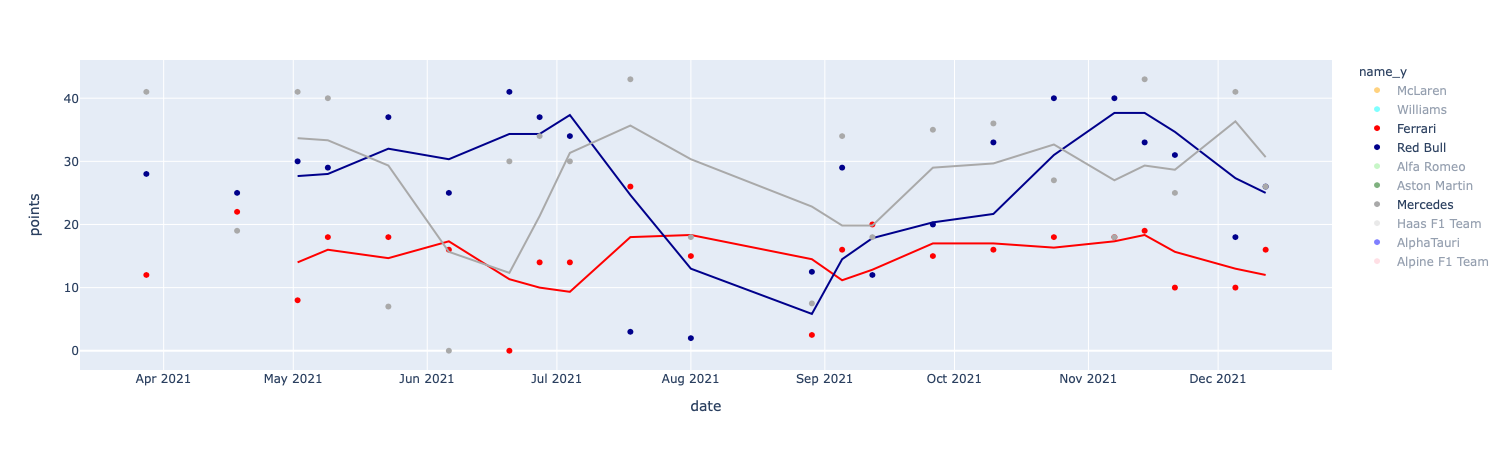

In [43]:
scatter = px.scatter(
    data_frame = year_2020_races, 
    x = "date", 
    y = "points", 
    color = "name_y", 
    color_discrete_map = {"McLaren": "orange", 
                          "Williams": "cyan", 
                          "Renault": "yellow", 
                          "Ferrari": "red", 
                          "Red Bull": "darkblue",
                          "Alfa Romeo": "lightgreen",
                          "Mercedes": "darkgrey",
                          "Haas F1 Team": "lightgrey",
                          "Racing Point": "pink",
                          "AlphaTauri": "blue",
                          "Alpine F1 Team": "pink",
                          "Aston Martin": "darkgreen"},
    trendline = "rolling",
    trendline_options=dict(window=3))
pio.show(scatter)

In [19]:
results.head()

,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
resultId,,,,,,,,,,,,,,,,,
1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [21]:
sprint_results.head()

,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,fastestLapTime,statusId
resultId,,,,,,,,,,,,,,,
1,1061,830,9,33,2,1,1,1,3,17,25:38.426,1538426,14,1:30.013,1
2,1061,1,131,44,1,2,2,2,2,17,+1.430,1539856,17,1:29.937,1
3,1061,822,131,77,3,3,3,3,1,17,+7.502,1545928,17,1:29.958,1
4,1061,844,6,16,4,4,4,4,0,17,+11.278,1549704,16,1:30.163,1
5,1061,846,1,4,6,5,5,5,0,17,+24.111,1562537,16,1:30.566,1


In [4]:
year_2020 = races[races['year'] == 2020]
year_2020_index = year_2020.index
year_2020_dates = year_2020['date']

year_2020_constructors = pd.DataFrame()

year_2020_constructors = constructor_standings[constructor_standings['raceId'].isin(year_2020_index)]

#for race_index in year_2020_index:
#    current_race = constructor_standings[constructor_standings['raceId'] == race_index]
#    year_2020_constructors = year_2020_constructors.append(current_race)

print(year_2020_constructors)

                        raceId  constructorId  points  position positionText  \
constructorStandingsId                                                         
27522                     1034            210     1.0         9            9   
27521                     1034              9    78.0         2            2   
27520                     1034              3     0.0        10           10   
27519                     1034             51     2.0         8            8   
27518                     1034              4    32.0         6            6   
...                        ...            ...     ...       ...          ...   
27658                     1047              4   181.0         5            5   
27659                     1047             51     8.0         8            8   
27660                     1047              3     0.0        10           10   
27661                     1047              9   319.0         2            2   
27662                     1047          